<a href="https://colab.research.google.com/github/FangTzuLiang/Image-Process/blob/main/HW1_0907.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DNN深度神經網路

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1500/1500 [==============================] - 19s 11ms/step - loss: 0.2677 - accuracy: 0.9216 - val_loss: 0.1340 - val_accuracy: 0.9595
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1110 - accuracy: 0.9665 - val_loss: 0.0989 - val_accuracy: 0.9711
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0837 - val_accuracy: 0.9738
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.0884 - val_accuracy: 0.9756
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0350 - accuracy: 0.9880 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step

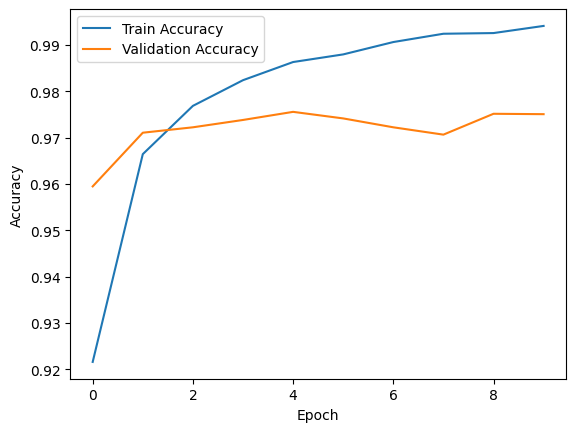

313/313 [==============================] - 1s 3ms/step
預測準確率： 0.9745


In [1]:
import numpy as np
import matplotlib.pyplot as plt#畫圖
# keras是開放的高階深度學習程式庫
from keras.datasets import mnist#手寫數字資料集
from keras.models import Sequential#神經網路模型
from keras.layers import Dense, Flatten
from keras.utils import to_categorical#One-Hot編碼
from sklearn.metrics import accuracy_score

# 加載MINST資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將圖片展平為一維數組
X_train = X_train.reshape(X_train.shape[0], -1)
# X_train.shape可查看X_train維數
X_test = X_test.reshape(X_test.shape[0], -1)

# 對像素值進行標準化處理，顏色表示0-255
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 將目標變量進行One-Hot編碼，將類別轉為二進制
y_train = to_categorical(y_train, 10)#有10個類別
y_test = to_categorical(y_test, 10)

# 建立神經網路模型
model = Sequential()#定義模型
model.add(Dense(128, activation='relu', input_shape=(784,)))#加入第一層神經層(input layer)，784組輸入，128組輸出
model.add(Dense(64, activation='relu'))#加入第二層神經層
model.add(Dense(10, activation='softmax'))#加入第三層神經層(output layer)

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#loss為損失函數，optimizer為優化函數，metrics為成效衡量指標

# 訓練模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
#validation_split表將廖切成train data佔0.8，test data佔0.2
#verbose為下方顯示模式

# 顯示訓練過程中的準確率變化(圖)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()#圖例
plt.show()

# 使用模型進行預測
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)#np.argmax找出y_pred中最大值的索引，axis=1表輸出每行中最大值的索引
y_true_classes = np.argmax(y_test, axis=1)

# 計算預測準確率
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("預測準確率：", accuracy)

CNN卷積神經網絡

Epoch 1/10
1500/1500 [==============================] - 51s 33ms/step - loss: 0.1512 - accuracy: 0.9538 - val_loss: 0.0525 - val_accuracy: 0.9838
Epoch 2/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0474 - val_accuracy: 0.9863
Epoch 4/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0522 - val_accuracy: 0.9864
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0509 - val_accuracy: 0.9880
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 7/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0405 -

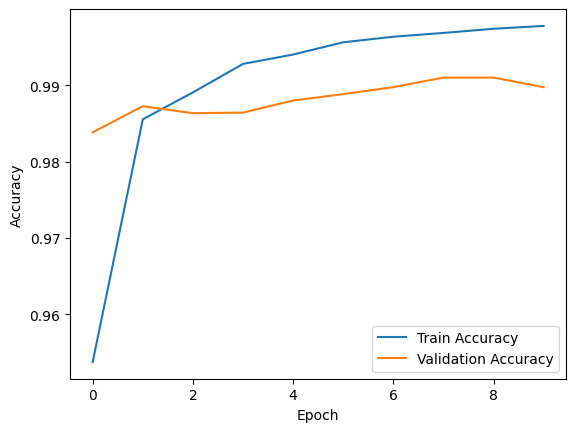

313/313 [==============================] - 3s 9ms/step
預測準確率： 0.99


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 加載MINST資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 對像素值進行標準化處理
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 將圖像數據轉換為四維數組（樣本數，高度，寬度，通道數）
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 將目標變量進行One-Hot編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立卷積神經網絡模型
#convolution layer的重點就是feature map，用一個kernel去對輸入圖片做卷積運算來得到一張輸出圖
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))#第一層卷積組合，32個卷積核的大小為3x3
model.add(MaxPooling2D(pool_size=(2, 2)))#第一層最大池化，pool_size為池化視窗的大小，因此圖像大小會減半
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))#第二層卷積組合
model.add(MaxPooling2D(pool_size=(2, 2)))#第二層最大池化
model.add(Flatten())#將卷積層的特徵圖展平成一維向量，以便後續的全連接層可以處理
#Fully Connected Networks，把 2D 的圖片拍扁變成 1D 的數列
model.add(Dense(128, activation='relu'))#全連接層包含128個神經元，可進一步處理展平的特徵向量
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# 顯示訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 使用模型進行預測
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 計算預測準確率
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("預測準確率：", accuracy)